In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex8data1.mat')

In [3]:
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()
X[:5]

array([[ 13.04681517,  14.74115241],
       [ 13.40852019,  13.7632696 ],
       [ 14.19591481,  15.85318113],
       [ 14.91470077,  16.17425987],
       [ 13.57669961,  14.04284944]])

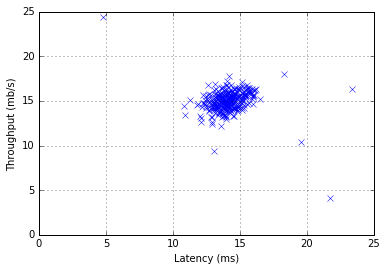

In [4]:
plt.plot(X[:,0],X[:,1], 'bx')
plt.grid(True)
plt.axis = ([0, 30, 0 ,30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

In [5]:
def estimateGaussian(X):
    return X.mean(axis=0), X.std(axis=0) ** 2
mu, sigma = estimateGaussian(X)
print mu
print sigma

[ 14.11222578  14.99771051]
[ 1.83263141  1.70974533]


In [6]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)

    if sigma.ndim == 1:
        sigma = np.diag(sigma)

    X = X - mu
    p = (2 * np.pi) ** (- k / 2) * np.linalg.det(sigma) ** (-0.5) * \
        np.exp(-0.5 * np.sum(X.dot(np.linalg.pinv(sigma))*X, axis=1))

    return p
p = multivariateGaussian(X, mu, sigma)
p[:5]

array([ 0.06470829,  0.05030417,  0.07245035,  0.05031575,  0.06368497])

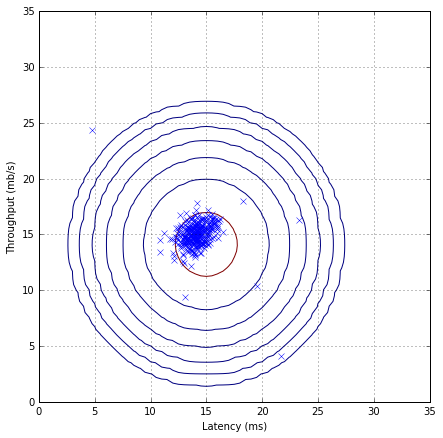

In [7]:
from math import isinf


def visualizeFit(X, mu, sigma2):
    """
    This visualization shows you the
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """
    n = np.linspace(0,35,71)
    X1 = np.meshgrid(n,n)
    Z = multivariateGaussian(np.column_stack((X1[0].T.flatten(), X1[1].T.flatten())),mu,sigma2)
    Z = Z.reshape(X1[0].shape)

    plt.figure(figsize=(7,7))
    plt.plot(X[:, 0], X[:, 1],'bx')
    # Do not plot if there are infinities
    if not isinf(np.sum(Z)):
        plt.contour(X1[0], X1[1], Z, 10.0**np.arange(-20, 0, 3).T)
        plt.xlabel('Latency (ms)')
        plt.ylabel('Throughput (mb/s)')
        plt.grid(True)
        
visualizeFit(X,  mu, sigma)
plt.show()

In [8]:
pval = multivariateGaussian(Xval, mu, sigma)
pval

array([  4.16320668e-02,   8.19090108e-02,   4.07157786e-02,
         6.19000296e-02,   7.11867554e-02,   4.24344853e-02,
         6.02008481e-02,   8.40342100e-02,   2.10898297e-02,
         7.69984880e-02,   7.99333934e-02,   4.26414727e-02,
         5.29650364e-02,   1.45616238e-02,   5.43344414e-02,
         4.40394423e-02,   4.36430996e-02,   5.70196137e-02,
         7.61418144e-02,   4.56875039e-02,   8.72843970e-02,
         3.48673523e-02,   8.46243029e-02,   7.21707760e-02,
         7.35073719e-02,   8.29581276e-02,   4.38096439e-02,
         7.12890067e-02,   4.24973261e-02,   6.78153446e-02,
         8.34299871e-02,   6.26720991e-02,   7.09268159e-02,
         8.87683974e-02,   6.38919731e-02,   7.22535016e-02,
         6.59214319e-02,   2.41859626e-02,   5.42033241e-02,
         8.69968693e-02,   5.65582369e-02,   3.59221959e-02,
         6.33421399e-02,   8.38169319e-02,   8.89797178e-02,
         7.43634297e-02,   3.60198670e-02,   8.51344681e-02,
         7.53586064e-02,

In [9]:
def selectThreshold(yval, pval):
    bestEpsilon = 0;
    bestF1 = 0;
    F1 = 0;

    stepsize = (np.max(pval) - np.min(pval)) / 1000;
    for epsilon in np.arange(np.min(pval),np.max(pval), stepsize):
        predictions = pval < epsilon
        tp = np.sum((predictions == 1) & (yval==1), dtype=np.float)
        fp = np.sum((predictions == 1) & (yval==0), dtype=np.float)
        fn = np.sum((predictions == 0) & (yval==1), dtype=np.float)
        prec = tp / (tp + fp);
        rec = tp / (tp + fn);
        F1 = 2 * prec * rec / (prec + rec);
        
        if F1 > bestF1:
           bestF1 = F1
           bestEpsilon = epsilon

    return bestEpsilon, bestF1
epsilon, F1 = selectThreshold(yval, pval)
print epsilon, F1

8.99085277927e-05 0.875


/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [10]:
outliers = np.where(p < epsilon)[0]
print outliers[:5]

[300 301 303 304 305]


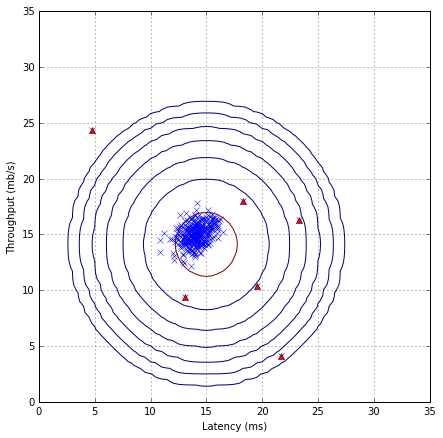

In [11]:
visualizeFit(X,  mu, sigma)
plt.plot(X[outliers, 0], X[outliers, 1], 'r^',)
plt.show()

In [12]:
data = scipy.io.loadmat('data/ex8data2.mat')

In [13]:
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()
X[:5]

array([[  6.65311366e+00,   1.36897016e+01,   1.75528453e+01,
         -1.19334974e+01,  -5.75640883e+00,   1.54359213e+01,
         -1.21367520e+01,   8.22412257e+00,  -4.88402408e+00,
          5.34933534e+00,   1.73513724e+01],
       [ -5.63054206e+00,  -1.89376673e+01,   1.86446242e+01,
         -6.15582498e+00,  -2.59888637e+01,   1.54095532e+01,
         -1.65955163e+01,   9.45465367e+00,  -2.87717344e+00,
         -6.00942041e+00,   1.92106361e+01],
       [  9.72152507e+00,  -9.98248898e+00,   1.55714341e+01,
         -3.22242657e+01,  -5.59579923e+00,   2.43213827e+01,
          8.32773533e-01,   1.07945546e+01,   7.27574802e-01,
          1.03929750e+01,   7.08599490e+00],
       [ -4.63576572e+00,  -1.07160396e+01,   2.03565706e+01,
         -9.00209733e+00,  -4.92056907e+00,  -4.26195747e+00,
         -1.30582878e+00,   9.49980333e-01,  -8.63410656e+00,
          1.98445438e-01,   6.77141253e-03],
       [ -1.28410444e+01,  -2.03883132e+01,   9.49193648e+00,
         -7.03

In [14]:
mu, sigma = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma)
pval = multivariateGaussian(Xval, mu, sigma)
epsilon, F1 = selectThreshold(yval, pval)
print epsilon, F1

5.49434834315e-19 0.615384615385


/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [15]:
print np.sum(p < epsilon)

117
